# Foundations of Data Science
## Homework 5 

Student Name: Ashish Bansal

Student Netid: ab6995
***

### Part 1: Critique this plan (8 points)
1\. After a few beers your CIO invited his buddy from Green Berry consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm. 

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Green Berry, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Green Berry says about the characteristics of your service is accurate.

Based on what we have covered in class, identify the four most serious weaknesses/flaws in this abridged version of Green Berry's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--- -------------------------------------------------------------------------- ---
                            Targeted Audience Expansion             
                      Prepared by Green Berry Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Green Berry) have a 
large database of consumers who can be targeted.  We will build a predictive model 
to estimate which of these consumers are the most likely to adopt the product, and
then target them with the special offer you have designed.

More specifically, we will build a logistic regression (LR) model to predict adop-
tion of the service by a consumer, based on the data on your current customers of 
this service.  The model will be based on their demographics and their usage of 
the service. We believe that logistic regression is the best choice of method be-
cause it is a tried-and-true statistical modeling technique, and we can easily 
interpret the coefficients of the model to infer whether the attributes are stat-
istically significant, and whether they make sense. If they are statistically sig-
nificant and they do make sense, then we can have confidence that the model will 
be accurate in predicting service uptake. We will apply the model to our large 
database of consumers, and select out those who have not yet subscribed and whom
the LR model predicts to be the most likely to subscribe.  To these we will send 
the targeted offer. As this is a fixed-profit-per-customer service, this also 
will in effect rank them by expected profit.
--- -------------------------------------------------------------------------- ---
```

<i>A.weakness</i>
<br>
1.There is no past data on the target variable because of this we have to collect the new structured data.
<br>
2.Its very Unclear that what evaluation strategy/Metrics will be used for the prediction results and how do we know that accuracy will be the best method for predictions. For this we have to choose what OUR main focus would be i.e TP or both TP AND FP.
<br>
3.Accuracy of model should be based on how well it predicts for the target variable not whether the attributes are statistically significant/make sense and model should be trained on training data and then on testing data in order to make sure it generalizes well and doesn’t overfit
<br>
4.There should be certain Need to establish what percentage of consumers fall under “most likely to subscribe"
<br>
<i>B.Alternative</i>
<br>
lr optimises the maximum likelihood of an occurence of X in a particular data class. This problem is highly non convex in the domain of function parameters and svm ,rf, nn are better approach in solving non convex problems.

### Part 2: Sentiment analysis (12 points)

In this assignment we will be looking at a directed, signed network regarding Wikipedia editors who want to become an administrator. In order for this to happen, a request for adminship (RfA) is submitted, either by the candidate or by another community member. Subsequently, any Wikipedia member may cast a supporting, neutral, or opposing vote.

The dataset and further description can be found here:
https://snap.stanford.edu/data/wiki-RfA.html

In sum, nodes represent Wikipedia members and edges represent votes. Each entry in the dataset also includes text of a comment associated with the vote.



1\. Convert the data into a pandas `DataFrame()`, which will have one column for each of the data attributes, SRC, TGT, etc. (3 points) 

In [224]:
import pandas as pd
import os
file = open('/Users/ashishbansal/Downloads/wiki-RfA.txt', encoding="utf8")
dict1 = {}
for line in file:
    try:
        col = line.split(':')[0]
        col = col.replace('\n','')
        data = line.split(':',1)[1]
        data = data.replace('\n','')
    #         print(col in dict1.keys())
        if col in dict1.keys():
            dict1[col].append(data)
    #             print(dict1)
        else:
    #             print("nai")
            dict1[col] = []
            dict1[col].append(data)
    except:
        pass
# dict1
df = pd.DataFrame(dict1)
df

,DAT,RES,SRC,TGT,TXT,VOT,YEA
0,"23:13, 19 April 2013",1,Steel1943,BDD,'''Support''' as co-nom.,1,2013
1,"01:04, 20 April 2013",1,Cuchullain,BDD,'''Support''' as nominator.--,1,2013
2,"23:43, 19 April 2013",1,INeverCry,BDD,'''Support''' per noms.,1,2013
3,"00:11, 20 April 2013",1,Cncmaster,BDD,'''Support''' per noms. BDD is a strong contri...,1,2013
4,"00:56, 20 April 2013",1,Miniapolis,BDD,"'''Support''', with great pleasure. I work wit...",1,2013
5,"01:53, 20 April 2013",1,Sven Manguard,BDD,'''Support''' There are plenty of important ro...,1,2013
6,"02:00, 20 April 2013",1,Ramaksoud2000,BDD,'''Support''' per noms. I don't see a reason n...,1,2013
7,"02:18, 20 April 2013",1,RockMagnetist,BDD,'''Support''' BDD already wields a broom pret...,1,2013
8,"02:22, 20 April 2013",1,Carrite,BDD,'''Support''' barring a completely unexpected ...,1,2013
9,"03:09, 20 April 2013",1,Someguy1221,BDD,'''Support''' because I see no good reason not...,1,2013


2\. Using the VOT column as the target variable, code the values as -1 or 0  as '0' and 1 to stay as '1'. (1 point)


In [225]:
#reference : https://pandas.pydata.org/pandas-docs/stable/missing_data.html, Lecture_TextMining_3_6053Fall17
df['VOT'] = pd.Series(df['VOT'], dtype=int)
df.VOT=df['VOT'].replace(0, 0)
df.VOT=df['VOT'].replace(-1, 0)
df.VOT=df['VOT'].replace(1, 1)

3\. Put all of the text (TXT column) into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. (2 points)

In [226]:
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings("ignore")
X = df['TXT']
Y = df['VOT']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

4\. Create a binary `CountVectorizer()` and `TfidfVectorizer()`. Use the original single words as well as bigrams. Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. (3 points)

In [227]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

binary_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2), stop_words = 'english')
binary_vectorizer.fit(X_train)
X_train_binary = binary_vectorizer.transform(X_train)
X_test_binary = binary_vectorizer.transform(X_test)


# Fit a counter
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words = 'english')
tfidf_vectorizer.fit(X_train)
# Transform to a counter
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


5\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph. (3 points)

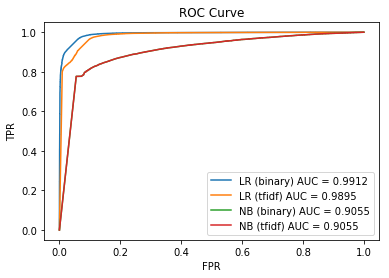

In [228]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

for model, model_label in [(LogisticRegression(), "LR"), (BernoulliNB(), "NB")]:
    for train, test, method in [(X_train_binary, X_test_binary, 'binary'),(X_train_tfidf, X_test_tfidf, 'tfidf')]:
        model.fit(train, Y_train)
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test_binary)[:,1])
        auc = metrics.roc_auc_score(Y_test, model.predict_proba(test)[:, 1])
        plt.plot(fpr, tpr, label=model_label + " (" + method + ") AUC = " + str(round(auc, 4)))
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title("ROC Curve")
plt.legend()

<b>LogisticRegression model did a better job here as we have large no. of features because of more no. of words in our dataset.</b>  

### Part 3: Network analysis and visualization (10 points)

In this part of the assignment we will analyze basic characteristics of the same Wikipedia network used in Part 2.


1. Prepare an edgefile for importing. First, map the node names to integer values. For data values, let's just start with the VOT column value. (2 points)

In [229]:
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import csv
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
#df3 = pd.DataFrame(dict1)
df1 = df[['SRC','VOT','TGT','RES']].copy()
df1_array=np.concatenate([df1['TGT'].values[:], df1['SRC'].values[:]])
le.fit(df1_array)
df1['SRC'] = le.transform(df1['SRC'])           
df1['TGT'] = le.transform(df1['TGT'])           
# dff = df1[df1['VOT'] != '0']
# dff_src = dff[dff['SRC'] != '']
# df_final = dff_src[dff_src['TGT'] != '']
# print(len(df_final))
# le = preprocessing.LabelEncoder()
# df1['SRC1'] = le.fit_transform(df1['SRC'])
# df1['TGT1'] = le.fit_transform(df1['TGT'])



2\. Now load the data as a graph object called 'Gwik'. (1 point)

In [230]:
Gwik = nx.from_pandas_dataframe(df1, 'SRC', 'TGT', 'VOT')
nx.write_edgelist(Gwik, "edgefile10.edgelist")

3\. Confirm the number of nodes and edges in the graph object. (2 points)

In [231]:
print (nx.info(Gwik))

Name: 
Type: Graph
Number of nodes: 11402
Number of edges: 182008
Average degree:  31.9256


4\. Compute the degree, betweneess and closeness centrality measures for the graph. Are all 3 meaningful here given what you know about the nodes and edges? (2 points)

<b>For our network problem betweenness_centrality determine who is the most "important" individual in the network <i>'TGT'</i> and <i>'SRC'</i> variable are in our network and how it make an impact on our <i>'VOT'</i> values.Because The betweenness centrality is a measure of how many shortest paths pass through a particular vertex. The more shortest paths that pass through the vertex, the more central the vertex is to the network. we can take advantage of Domino's multi-core hardware to compute the betweenness centrality of each vertex in the network using a parallelized algorithm.</b>

In [233]:
list(nx.degree_centrality(Gwik).values())[0:5]

[0.08122094553109376,
 8.771160424524164e-05,
 0.0010525392509428996,
 0.0002631348127357249,
 8.771160424524164e-05]

In [245]:
# betweenness_centrality = nx.betweenness_centrality(Gwik)
list(nx.betweenness_centrality(Gwik).values())[0:5]

[0.04547569529979977, 0.0, 4.0625753390385735e-07, 6.594244451968818e-10, 0.0]

In [246]:
list(nx.closeness_centrality(Gwik).values())[0:5]

[0.46332344454829927,
 0.265646115848828,
 0.29876834381551365,
 0.29044913764553026,
 0.2702619414483821]

5\. Now visualize the graph. How do you visualize the edges to communicate vote values? (1 point)

<b>i have used the best_partition from community to find the communities and have seen how they are communicating with each other.</b>


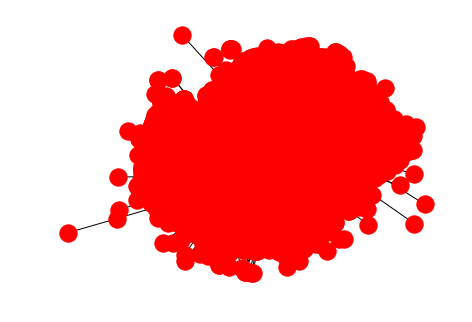

In [232]:
nx.draw(Gwik)

In [234]:
#refrence for this part :https://networkx.github.io/documentation/stable/reference/algorithms/community.html
import community
partition = community.best_partition(Gwik)

values = [parts.get(node) for node in Gwik.nodes()]
modularity = community.modularity(partition, Gwik)

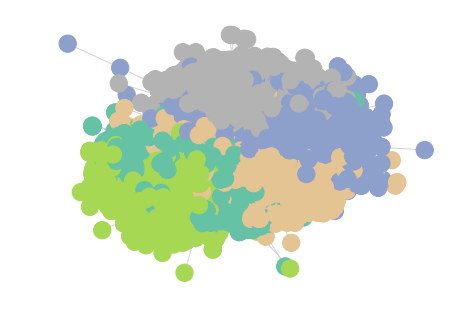

In [235]:
colors = [partition[n] for n in Gwik.nodes()] 
my_colors = plt.cm.Set2 
nx.draw(Gwik, node_color=colors, cmap = my_colors, edge_color = "#D4D5CE")


6\. Now also add in the resolution of the vote into your graph, and a new visualization of the network. Explain your choice of how to visually show this new information? (2 points)

In [238]:
Gwik1 = nx.from_pandas_dataframe(df1, 'SRC', 'TGT', ['VOT','RES'])
nx.write_edgelist(Gwik1, "edgefiledf_Gwik11.edgelist")


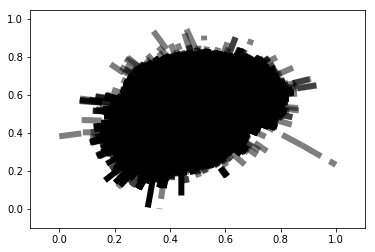

In [243]:
elarge=[(u,v) for (u,v,d) in Gwik1.edges(data=True) if d['RES']=='1']
esmall=[(u,v) for (u,v,d) in Gwik1.edges(data=True) if d['RES']=='-1']
pos=nx.spring_layout(Gwik1)
nx.draw_networkx_edges(Gwik1,pos,edgelist=elarge,width=6)
nx.draw_networkx_edges(Gwik1,pos,edgelist=esmall,width=6,alpha=0.5,edge_color='black',style='dashed')
plt.show()

In this part i choose to represent the edgeweights to the value of RES and representing the large weights as 1 and small as -1 and colour coded as black with style choosed to be dashed.
<br>
refrence for this part : https://networkx.github.io/documentation/networkx-1.10/examples/drawing/weighted_graph.html